# Least square fitting

If we have given data points and we want to fit the given data points with straight lines($y = mx + c$).We define a quatity **Sum of square of daviation**($\mathcal S$)
$$\mathcal S = \sum_{i = 0}^{n-1}(y_i - \tilde{y_i})$$
Where $y_i$'s are given experimental data and $\tilde{y_i}$'s are those if we put $x_i$(given $x_i$'s) the straight line($y = mx + c$) equation give. So final expression for $\mathcal S$ becomes 
$$\mathcal S = \sum_{i = 0}^{n-1}(y_i - mx_i - c)$$
*Now we have to minimised $\mathcal S$. So that the **distance between given points and the straight lines** (Centroid of the data points) become less*. So 
$$\frac{\partial \mathcal S}{\partial m}=0$$  

$$\frac{\partial \mathcal S}{\partial c}=0$$

Applying these we will end up with 
$$m \sum_{i = 0}^{n}x_i^2 + c \sum_{i = 0}^{n}x_i = \sum_{i = 0}^{n-1}x_iy_i$$

$$m \sum_{i = 0}^{n}x_i + c n  = \sum_{i = 0}^{n-1}y_i$$

##### Solving these equations:
**Guassain elemination**

Augmented matrix:
\begin{bmatrix}
\sum x_i^2 & \sum x_i & \sum x_iy_i\\
\sum x_i & n & \sum y_i
\end{bmatrix}

**Other Way**:
If you solve two equation simulataneously we will end up with:

$$m = \frac{n \bar{x} \bar{y} - \sum x_iy_i}{Z}$$
$$c = \frac{\bar{y}\sum x_i^2 - \bar{x}\sum x_iy_i}{Z}$$
Where $Z = n \bar{x}^2 - \sum x_i^2$. $\bar{x} = \frac{\sum x_i}{n}$ A rigorous [calculation](https://github.com/Souvik-0612/UnderGradHWs/blob/main/4th%20Sem/Numerical%20Analysis/Least%20Square%20Fit/Least%20Square%20Fit%20for%20Straight%20Lines.pdf) made by me.
### Goodness of fit
Correction of coefficient
$$cc = \sqrt {\frac{\mathcal S_y - S}{\mathcal S_y}}$$
Where $S_y = \sum_{i = 0}^{m} (y_i - \tilde{y})^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])

In [2]:
# Experimental data
T = np.array([800, 1000, 1100, 1240, 1300, 1400, 1540, 1560, 1720, 1760, 1780, 1840, 1900, 1940, 2040, 2140, 2340])
P = np.array([154, 316.4, 457.6, 737.2, 970.2, 1242, 1650, 1835, 2488, 2724, 3193.6, 4137, 4902, 5148, 6051.6, 8077.6, 9359])

# Stephan law verification
Radition per unit time per unit area is
$$P = \sigma (T- T_0)^n$$
$T_0$ is room temparature which is 25°(298K) But we have done the experiment very large teparature as well as the power is approximately 4(Stephan law) so we neglect this. Taking log both side, $$\ln P = n\ln T+\ln \sigma$$
Compare this $y = nx+c$. where $x = \ln T$, $y = \ln p$ & $c = \ln \sigma$. We will end up with least square fitting, 

In [3]:
newT = np.log(T)
newP = np.log(P)


#You can Solve in this way also! Though you are doing things without knowing the algorithm.
#Ax = b
#import numpy.linalg as ln
#A = np.array([[sum(newT**2), sum(newT)],
#              [sum(newT), len(newT)]])
#b = np.array([sum(newT*newP), sum(newP)])

#m, c = ln.solve(A, b)


In [4]:
# Gaussian elemination
Aug = np.array([[sum(newT**2), sum(newT), sum(newT*newP)],
[sum(newT), len(newT), sum(newP)]], dtype=float)


Aug[1] = Aug[1] - Aug[1][0]*Aug[0]/Aug[0][0] #Elemination

#Back Substitution
c = Aug[1][-1]/Aug[1][-2]
m = (Aug[0][-1] - c*Aug[0][-2])/Aug[0][0]

In [5]:
print("Slope", m)
print("Intercept", c)

Slope 4.020327606660129
Intercept -21.98471662046669


In [6]:
#Check by the formula we had derived by our hand
n = len(newT)
x = newT; avrX = sum(x)/n
y = newP; avrY = sum(y)/n

Z = n*(sum(x)/n)**2 - sum(x**2)

m1 = (n*avrX*avrY - sum(x*y))/Z
c1 = (avrY*sum(x**2)-avrX*sum(x*y))/Z

print(m1, c1)

4.0203276066598415 21.984716620464564


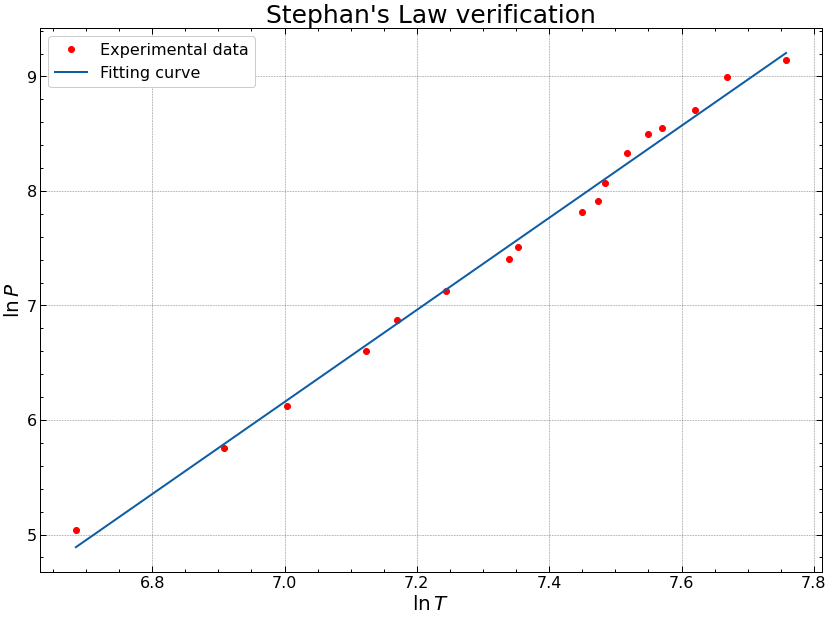

In [7]:
x = np.linspace(newT[0], newT[-1], 100)
y = m*x + c

plt.figure(figsize = (14, 10))
plt.title("Stephan's Law verification", size = 25)
plt.plot(newT, newP, "ro", label = "Experimental data")
plt.plot(x, y, label = "Fitting curve")
plt.legend(loc = 'best')
plt.xlabel(r"$\ln T$", size = 20)
plt.ylabel(r"$\ln P$", size = 20)
plt.show()

In [8]:
x = newT
y = m*x + c
print("Experimental Data \t  Fitted values")
print("")
for _ in range(len(x)):
              print(newP[_],"\t", y[_])

Experimental Data 	  Fitted values

5.0369526024136295 	 4.88961244808074
5.757007235893499 	 5.786722627677438
6.125995440065588 	 6.169900774740505
6.602859225795668 	 6.651540845658193
6.877502235811116 	 6.841512923117172
7.124478262493424 	 7.139451249440381
7.408530566894626 	 7.522629396503447
7.51479976048867 	 7.574505311185163
7.81923445385907 	 7.967043945845017
7.909856667269403 	 8.05946934062759
8.068904086117145 	 8.104897254557962
8.327726166461412 	 8.238179988855812
8.497398564088058 	 8.367185525698407
8.546363568716018 	 8.45094538043346
8.70807797887068 	 8.653014422364453
8.99685007769011 	 8.845411305449812
9.144093726157257 	 9.204607878849846


In [9]:
Sy = sum((newP - y)**2)
S = sum(newP - y)
cc = np.sqrt((Sy - S)/Sy)
print(cc)

1.000000000000069
